# Missing values and outliers in raw data 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('tableau-colorblind10')

# Table of content
### 1. Load, merge and describe the original data
### 2. Missing values
### 3. Distribution of numerical variables
### 4. Outliers
________________

## 1. Load, merge and describe the original data

In [2]:
train = pd.read_csv("../../data/train.csv")
store = pd.read_csv("../../data/store.csv")

/Users/magdalenablum-oeste/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
merged_train_store = pd.merge(store, train, on='Store', how='left')

In [4]:
merged_train_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-01,2.0,0.0,0.0,0.0,0.0,a,1.0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-02,3.0,5530.0,668.0,NaN,0.0,0,1.0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-03,4.0,4327.0,578.0,1.0,0.0,0,1.0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-04,5.0,4486.0,619.0,1.0,0.0,0,1.0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013-01-05,6.0,4997.0,635.0,1.0,0.0,NaN,1.0


In [10]:
merged_train_store.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [5]:
merged_train_store.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,618473.0,558.105623,321.885545,1.0,279.0,558.0,837.0,1115.0
CompetitionDistance,616838.0,5412.023773,7673.525463,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,422043.0,7.224053,3.210645,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,422043.0,2008.673521,6.140044,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,618473.0,0.509041,0.499919,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,314828.0,23.515643,14.119306,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,314828.0,2011.760123,1.670273,2009.0,2011.0,2012.0,2013.0,2015.0
DayOfWeek,600036.0,3.994974,1.997527,1.0,2.0,4.0,6.0,7.0
Sales,600028.0,5667.469356,3809.436273,0.0,3639.0,5625.0,7713.0,38037.0
Customers,599957.0,628.818459,463.765657,0.0,397.0,604.0,833.0,7388.0


## 2. Missing values

In [9]:
# Number of columnns with missing values
print(f"Merged data frame contains {sum(merged_train_store.isnull().any())} columns.")

Merged table contains 13 columns.


In [7]:
merged_train_store.shape

(618473, 18)

In [8]:
merged_train_store.isnull().shape
sum(merged_train_store.isnull().any())

13

### A heat map of the merged data set with row index (y-axis) and column names (x-axis) showing missing values as value of 1 and zero for any value in the column.

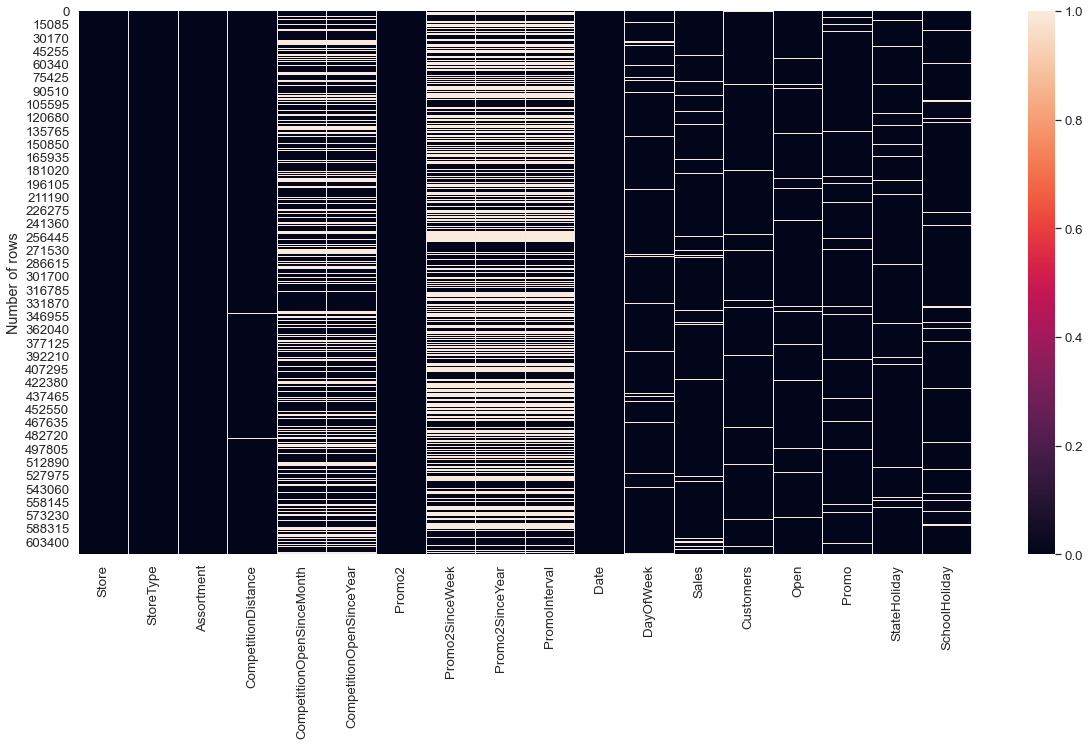

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=1.2)
sns.heatmap(merged_train_store.isnull())
plt.ylabel('Number of rows');

## 3. Distribution of numerical features

#### Histograms showing counts of feature values. For example, the first chart shows the number of entires for each store number id. 

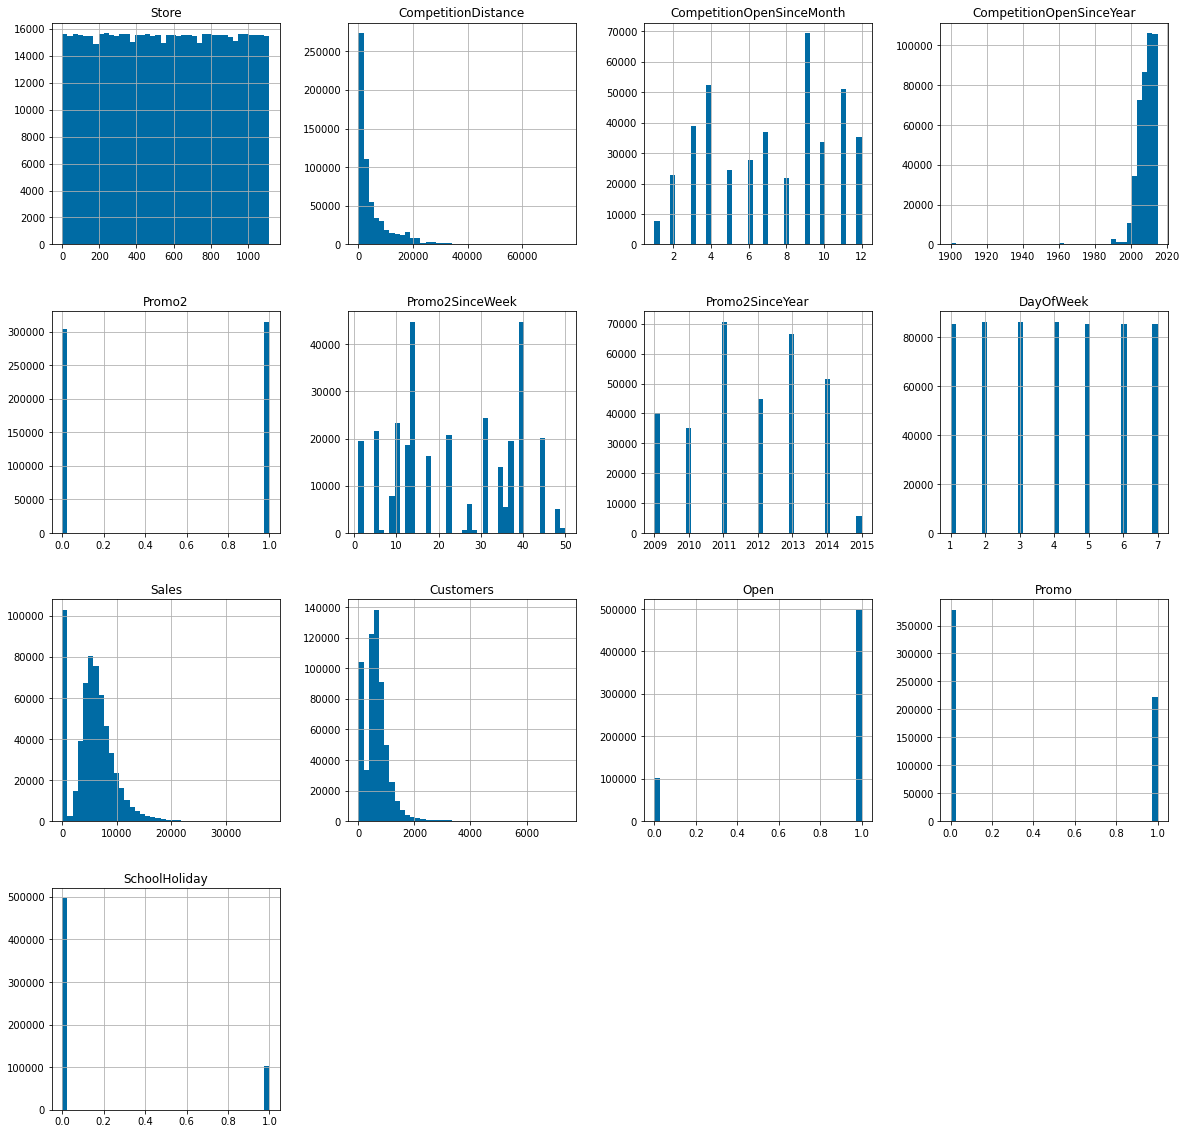

In [11]:
merged_train_store.hist(figsize=[20,20], bins=40);

## 4. Outliers
For indicating outliers we use boxplots which are a standrdadized way of how to display distribution of data based on five numbers: 
- minimum Q1 -1.5*IQR
- first quartile Q1
- median Q2
- third quartile Q3
- maximum Q3 + 1.5*IQR

The space between the different parts of the box indicate the degree of dispersion and skewness in the data, and show outliers. In a boxplot, an outlier is defined as a point outside the minimum or maximum.
![title](boxplot.png)

[Source](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)


### 4.1 Target feature "Sales"

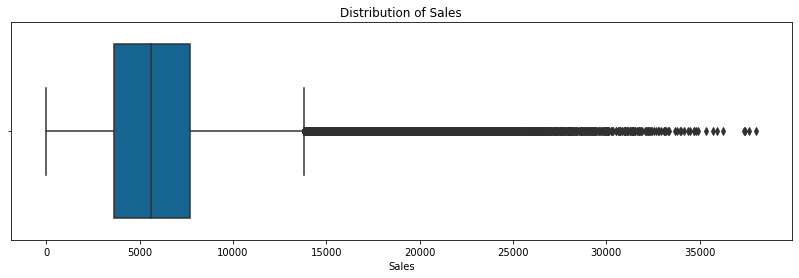

In [30]:
# Drop 'Sales' rows with missing values
nonzero_merged_Sales = merged_train_store.loc[~merged_train_store.loc[:, 'Sales'].isnull()]

plt.figure(figsize=(14, 4))
sns.boxplot(x=nonzero_merged_Sales.Sales)
plt.title('Distribution of Sales');

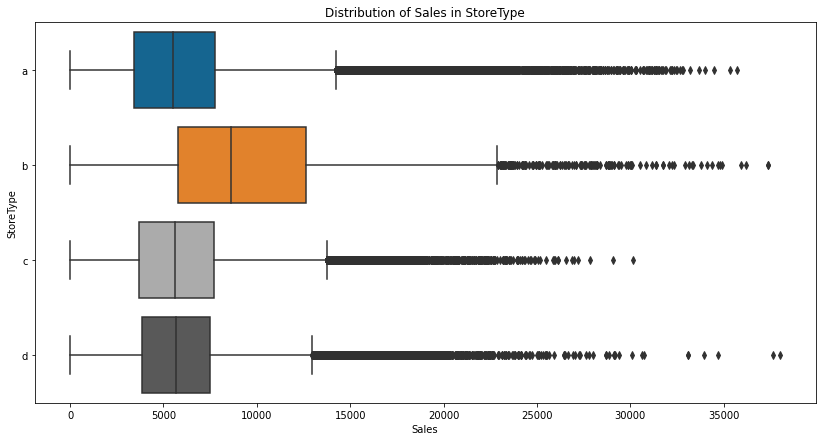

In [27]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Sales', y='StoreType',
            #hue='StoreType',
            orient="h",
            data=nonzero_merged_Sales.sort_values(by = ["StoreType"]))
plt.title('Distribution of Sales in StoreType');

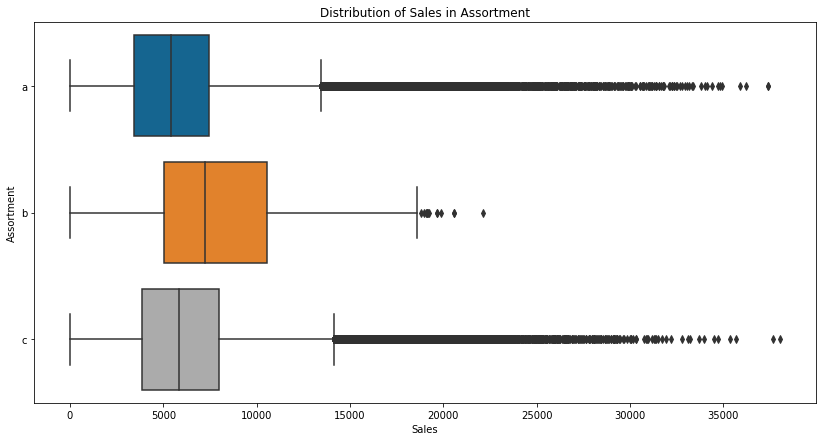

In [22]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Sales', y='Assortment',
            #hue='StoreType',
            orient="h",
            data=nonzero_merged_Sales.sort_values(by = ["Assortment"]))
plt.title('Distribution of Sales in Assortment');

### 4.2 Distribution of "CompetitionDistance"

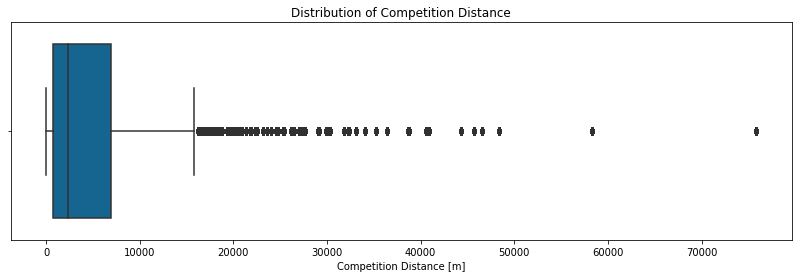

In [33]:
plt.figure(figsize=(14, 4))
sns.boxplot(x=merged_train_store.CompetitionDistance)
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance [m]');

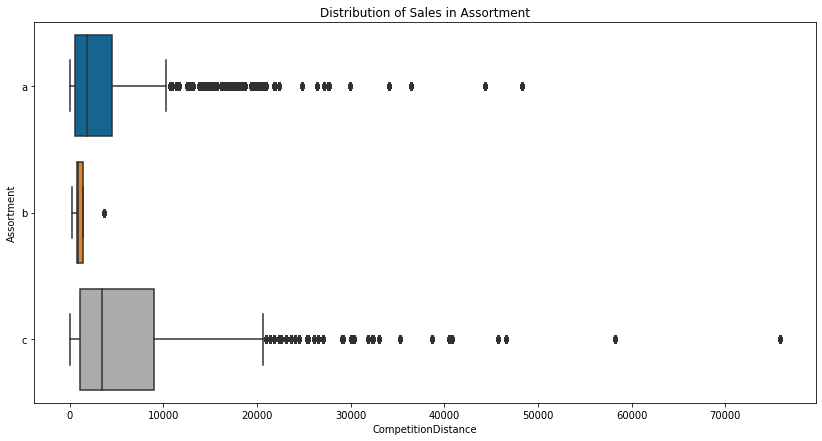

In [34]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='CompetitionDistance', y='Assortment',
            #hue='StoreType',
            orient="h",
            data=merged_train_store.sort_values(by = ["Assortment"]))
plt.title('Distribution of Sales in Assortment');

### 4.3 Distribution of "Customer"

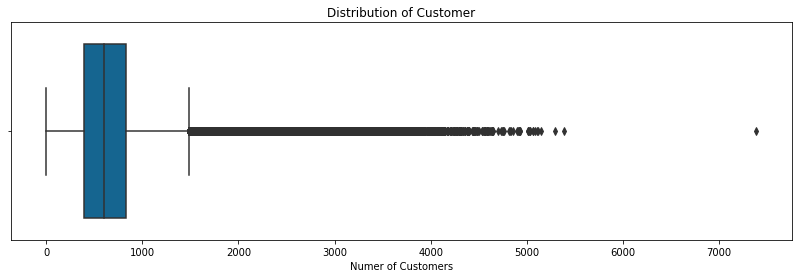

In [36]:
plt.figure(figsize=(14, 4))
sns.boxplot(x=merged_train_store.Customers)
plt.title('Distribution of Customer')
plt.xlabel('Numer of Customers');

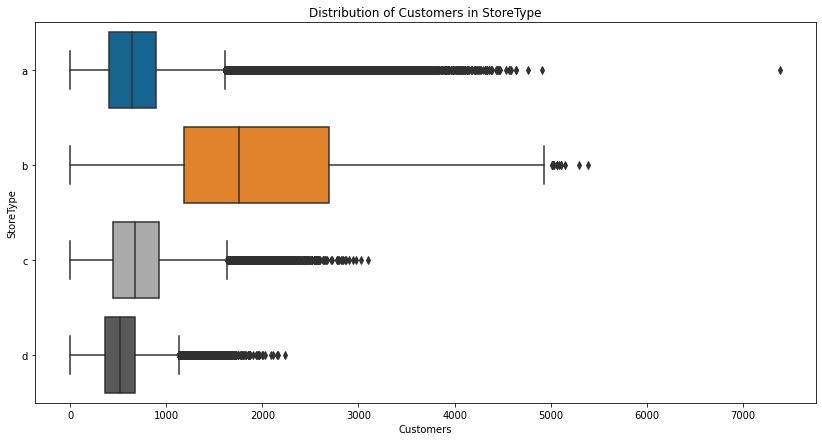

In [38]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Customers', y='StoreType',
            #hue='StoreType',
            orient="h",
            data=merged_train_store.sort_values(by = ["StoreType"]))
plt.title('Distribution of Customers in StoreType');